In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import numpy as np

#os.chdir("drive/My Drive/winequality")
files = "winequality-red.csv"

In [2]:
content = []
with open(files) as f: 
  for line in f:
    line = re.sub("(\n)","",line)
    content.append(line.split(';'))

In [3]:
red_wine_df = pd.DataFrame(content, columns = ["fixed acidity","volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide","density","pH","sulphates","alcohol","quality"])
red_wine_df.drop([0], inplace = True)

red_wine_df.sample(frac= 1.0)

y = red_wine_df['quality']
x = red_wine_df[["fixed acidity","volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide","density","pH","sulphates","alcohol"]]

In [4]:
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 1 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         1599 non-null   object
 1   volatile acidity      1599 non-null   object
 2   citric acid           1599 non-null   object
 3   residual sugar        1599 non-null   object
 4   chlorides             1599 non-null   object
 5   free sulfur dioxide   1599 non-null   object
 6   total sulfur dioxide  1599 non-null   object
 7   density               1599 non-null   object
 8   pH                    1599 non-null   object
 9   sulphates             1599 non-null   object
 10  alcohol               1599 non-null   object
 11  quality               1599 non-null   object
dtypes: object(12)
memory usage: 150.0+ KB


**Linear Model**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import numpy as np

In [8]:
size = [0.5,0.4,0.3,0.2,0.1] #varying test and train_size
yvalues_test = {}; intercept = {}; predictions = {}; coeff = {}; xvalues_test = {}; rmse = {}
lr_model = LinearRegression()

for i in range(len(size)):
  current = size[i]
  x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = current)
  lr_model.fit(x_train,y_train)

  w = lr_model.coef_; b = lr_model.intercept_; coeff[current] = w; intercept[current] = b
  #predict output based on this model
  predictions[current] = lr_model.predict(x_test)
  xvalues_test[current] = x_test
  yvalues_test[current] = y_test


In [9]:
mse_lr = {}; mae_lr = {}; rmse_lr = {}

for i in range(len(size)):
  current = size[i]
  mse_lr[current] = metrics.mean_squared_error(lr_model.predict(xvalues_test[current]), yvalues_test[current])
  mae_lr[current] = metrics.mean_absolute_error(lr_model.predict(xvalues_test[current]), yvalues_test[current])
  rmse_lr[current] = np.sqrt(metrics.mean_absolute_error(lr_model.predict(xvalues_test[current]), yvalues_test[current]))

In [10]:
mse_lr

{0.5: 0.44965863025393504,
 0.4: 0.3926602158921043,
 0.3: 0.4357139541793129,
 0.2: 0.44394226030218054,
 0.1: 0.35432014789226807}

**Two layer Neural Networks**

In [11]:
#Convert data from csvs into arrays
red_wine_data = np.genfromtxt(files, delimiter = ';')

#Removes headers as nan values
red_wine_data = red_wine_data[1:,:] #Numpy arrays are immutable thus can't be deleted. It can only be reassigned.

#Creates quality array from dataset
quality_data = red_wine_data[1:,-1:]

#Creates input array whose values determine the output 
red_wine_input_data = red_wine_data[1:,:-1]

SPLIT,SHUFFLE

In [27]:
train_wine, test_wine = train_test_split(red_wine_data)

y_train_wine = train_wine[1:,-1:]
x_train_wine = train_wine[1:, :-1]

y_test_wine = test_wine[1:,-1:]
x_test_wine = test_wine[1:, :-1]

In [13]:
X_input = red_wine_input_data.T
y_output = quality_data.T

N, D_in, H, D_out = 1598, 11, 30, 1

#define activation function
f = lambda x:1/(1+np.exp(-x))  #sigmoid function
f_relu = lambda x: np.maximum(0,x)    #relu function 

In [14]:
#create computations

loss_f = []
loss_relu = []
runs = range(2000)
for i in runs:
  w1,w2 = np.random.randn(H, D_in), np.random.randn(D_out,H)
  h1 = 1/(1 + np.exp(-np.dot(w1,X_input).astype(np.float64)))
  h1_relu = f_relu(np.dot(w1, X_input))

  pred = np.dot(w2,h1)
  pred_relu = np.dot(w2, h1_relu)

  loss_relu.append(np.square(pred_relu - y_output).sum())
  loss_f.append(np.square(pred-y_output).sum())

#if there are more hidden layers
#h2 = f(np.dot(w2,h1))

#continue working on this 

/var/folders/3v/kl4z85b17kd84k1hy0srlb3w0000gn/T/ipykernel_22196/2798228895.py:8: RuntimeWarning: overflow encountered in exp
  h1 = 1/(1 + np.exp(-np.dot(w1,X_input).astype(np.float64)))


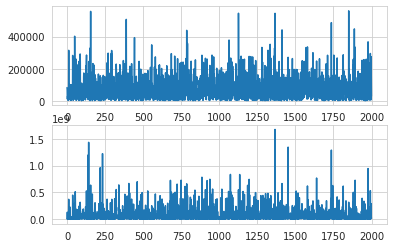

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(2)
ax[0].plot(runs, loss_f)
ax[1].plot(runs, loss_relu)

XGBOOST on tabular data

In [38]:
from xgboost import XGBRegressor, XGBClassifier, XGBRFRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [28]:
xg_model = XGBRegressor()

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xg_model, parameters, n_jobs = 10)
xgb_grid.fit(x_train_wine,y_train_wine)

print(xgb_grid.best_estimator_)
print(xgb_grid.best_params_)

[00:07:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:07:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:07:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:07:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameter

In [29]:
best_xg_model = XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.03, max_depth = 7, min_child_weight = 4, n_estimators = 500, nthread = 4, subsample = 0.7)

In [36]:
best_xg_model.fit(x_train_wine, y_train_wine)
predictions = best_xg_model.predict(x_test_wine)
predictions = np.round(predictions, 0)

accuracy_score(predictions, y_test_wine)

0.6741854636591479

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
random_model = RandomForestRegressor()
param = {'n_estimators': [500],
        'max_depth': [3,5,7,9],
        'min_samples_split': [2,3,4],
        'min_samples_leaf': [1,3,5,7],
        'n_jobs': [300] 
        }
best_grid_randomforest = GridSearchCV(random_model, param, n_jobs= 10)
best_grid_randomforest.fit(x_test_wine,y_test_wine)

print(best_grid_randomforest.best_params_)

/Users/max/Desktop/Wine_equality_/temp_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/max/Desktop/Wine_equality_/temp_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/max/Desktop/Wine_equality_/temp_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/max/Desktop/Wine_equality_/temp_env/lib

{'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 4, 'n_estimators': 500, 'n_jobs': 300}


In [61]:
best_xgb_model = RandomForestRegressor(n_jobs = 300, min_samples_split = 4, max_depth = 5, min_samples_leaf = 7, n_estimators = 500)

best_xgb_model.fit(x_train_wine, y_train_wine)
pred = best_xgb_model.predict(x_test_wine)

pred = np.round(pred, 0)
pred

accuracy_score(pred, y_test_wine)

/var/folders/3v/kl4z85b17kd84k1hy0srlb3w0000gn/T/ipykernel_22196/3389255161.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_xgb_model.fit(x_train_wine, y_train_wine)


0.5914786967418546

Next step, use cross validation 